In [1]:
#Instalar paqueteria pandas
#!pip install pandas
import pandas as pd

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt

In [4]:
datos = pd.read_csv("Datos_Indice.csv")

In [5]:
datos.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,1,1,1,0.033333,2087,1.260266,1,...,1,0.033333,0.033333,0.033333,2087,2087,2087,1.260266,1.260266,1.260266
1,1,1,1,1,0,5,0.166667,2106,1.271739,1,...,1,0.033333,0.033333,0.033333,2087,2087,2087,1.260266,1.260266,1.260266
2,1,2,1,0,0,1,0.033333,2028,1.224638,1,...,1,0.166667,0.033333,0.033333,2106,2087,2087,1.271739,1.260266,1.260266
3,1,3,1,0,0,1,0.033333,1187,0.716787,0,...,1,0.033333,0.166667,0.033333,2028,2106,2087,1.224638,1.271739,1.260266
4,1,4,1,0,0,0,0.000000,695,0.419686,0,...,5,0.033333,0.033333,0.166667,1187,2028,2106,0.716787,1.224638,1.271739
5,1,5,1,0,0,2,0.066667,703,0.424517,0,...,1,0.000000,0.033333,0.033333,695,1187,2028,0.419686,0.716787,1.224638
6,1,6,1,0,0,3,0.100000,701,0.423309,0,...,1,0.066667,0.000000,0.033333,703,695,1187,0.424517,0.419686,0.716787
7,1,7,1,0,0,2,0.066667,419,0.253019,0,...,0,0.100000,0.066667,0.000000,701,703,695,0.423309,0.424517,0.419686
8,1,8,1,0,0,3,0.100000,268,0.161836,0,...,2,0.066667,0.100000,0.066667,419,701,703,0.253019,0.423309,0.424517
9,1,9,1,0,2,0,0.000000,142,0.085749,0,...,3,0.100000,0.066667,0.100000,268,419,701,0.161836,0.253019,0.423309


In [6]:
datos.shape

(496799, 24)

In [7]:
datos.columns #Nombre de columnas

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

In [8]:
datos_ma = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1) #quitar. columnas axis=1, filas axis=0

In [9]:
datos_ma.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,1,1
1,1,1,1,1,0
2,1,2,1,0,0
3,1,3,1,0,0
4,1,4,1,0,0
5,1,5,1,0,0
6,1,6,1,0,0
7,1,7,1,0,0
8,1,8,1,0,0
9,1,9,1,0,2


In [10]:
#pedir lo del mes anteior
datos_ma['m1_pedir_lo_del_mes_pasado'] = datos_ma['ventas_totales']

In [11]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado
0,1,0,1,1,1,1
1,1,1,1,1,0,1
2,1,2,1,0,0,0
3,1,3,1,0,0,0
4,1,4,1,0,0,0
5,1,5,1,0,0,0
6,1,6,1,0,0,0
7,1,7,1,0,0,0
8,1,8,1,0,0,0
9,1,9,1,0,2,0


In [12]:
#Pedir un promedio de los 2 meses anteriores (rolling es por punto de venta y por producto por eso NaN al inicio de cada producto)
datos_ma['m2_promedio_de_dos_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)

In [13]:
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores
0,1,0,1,1,1,1,NaN
1,1,1,1,1,0,1,1.0
2,1,2,1,0,0,0,0.5
3,1,3,1,0,0,0,0.0
4,1,4,1,0,0,0,0.0
5,1,5,1,0,0,0,0.0
6,1,6,1,0,0,0,0.0
7,1,7,1,0,0,0,0.0
8,1,8,1,0,0,0,0.0
9,1,9,1,0,2,0,0.0


In [14]:
#Pedir un promedio de los 2 meses anteriores 
datos_ma['m3_promedio_de_tres_meses_anteriores'] = datos_ma.groupby(['pdv_id','sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)
datos_ma.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,1,1,1,NaN,NaN
1,1,1,1,1,0,1,1.0,NaN
2,1,2,1,0,0,0,0.5,0.666667
3,1,3,1,0,0,0,0.0,0.333333
4,1,4,1,0,0,0,0.0,0.000000
5,1,5,1,0,0,0,0.0,0.000000
6,1,6,1,0,0,0,0.0,0.000000
7,1,7,1,0,0,0,0.0,0.000000
8,1,8,1,0,0,0,0.0,0.000000
9,1,9,1,0,2,0,0.0,0.000000


In [15]:
error_julio= datos_ma[datos_ma.mes_id == 0]
error_julio.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,1,1,1,NaN,NaN
10,1,0,2,0,2,0,NaN,NaN
20,1,0,3,0,1,0,NaN,NaN
30,1,0,4,0,1,0,NaN,NaN
40,1,0,5,0,0,0,NaN,NaN


In [16]:
error_agosto= datos_ma[datos_ma.mes_id == 1]
error_agosto.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
1,1,1,1,1,0,1,1.0,NaN
11,1,1,2,2,1,2,1.0,NaN
21,1,1,3,1,0,1,0.5,NaN
31,1,1,4,1,0,1,0.5,NaN
41,1,1,5,0,0,0,0.0,NaN


In [17]:
error_septiembre= datos_ma[datos_ma.mes_id == 2]
error_septiembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
2,1,2,1,0,0,0,0.5,0.666667
12,1,2,2,1,0,1,1.5,1.000000
22,1,2,3,0,1,0,0.5,0.333333
32,1,2,4,0,0,0,0.5,0.333333
42,1,2,5,0,0,0,0.0,0.000000


In [18]:
error_octubre= datos_ma[datos_ma.mes_id == 3]
error_octubre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
3,1,3,1,0,0,0,0.0,0.333333
13,1,3,2,0,0,0,0.5,1.000000
23,1,3,3,1,0,1,0.5,0.666667
33,1,3,4,0,0,0,0.0,0.333333
43,1,3,5,0,0,0,0.0,0.000000


In [19]:
error_noviembre= datos_ma[datos_ma.mes_id == 4]
error_noviembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
4,1,4,1,0,0,0,0.0,0.000000
14,1,4,2,0,1,0,0.0,0.333333
24,1,4,3,0,0,0,0.5,0.333333
34,1,4,4,0,0,0,0.0,0.000000
44,1,4,5,0,1,0,0.0,0.000000


In [20]:
error_diciembre= datos_ma[datos_ma.mes_id == 5]
error_diciembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
5,1,5,1,0,0,0,0.0,0.000000
15,1,5,2,1,0,1,0.5,0.333333
25,1,5,3,0,0,0,0.0,0.333333
35,1,5,4,0,0,0,0.0,0.000000
45,1,5,5,1,0,1,0.5,0.333333


In [21]:
error_enero= datos_ma[datos_ma.mes_id == 6]
error_enero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
6,1,6,1,0,0,0,0.0,0.000000
16,1,6,2,0,0,0,0.5,0.333333
26,1,6,3,0,0,0,0.0,0.000000
36,1,6,4,0,0,0,0.0,0.000000
46,1,6,5,0,0,0,0.5,0.333333


In [22]:
error_febrero= datos_ma[datos_ma.mes_id == 7]
error_febrero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
7,1,7,1,0,0,0,0.0,0.000000
17,1,7,2,0,0,0,0.0,0.333333
27,1,7,3,0,0,0,0.0,0.000000
37,1,7,4,0,0,0,0.0,0.000000
47,1,7,5,0,0,0,0.0,0.333333


In [23]:
error_febrero.shape

(49680, 8)

In [24]:
error_marzo= datos_ma[datos_ma.mes_id == 8]
error_marzo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,0,0,0,0.0,0.0
18,1,8,2,0,0,0,0.0,0.0
28,1,8,3,0,0,0,0.0,0.0
38,1,8,4,0,0,0,0.0,0.0
48,1,8,5,0,0,0,0.0,0.0


In [25]:
error_marzo.shape

(49680, 8)

In [26]:
error_abril= datos_ma[datos_ma.mes_id == 9]
error_abril.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
9,1,9,1,0,2,0,0.0,0.0
19,1,9,2,0,1,0,0.0,0.0
29,1,9,3,0,1,0,0.0,0.0
39,1,9,4,0,0,0,0.0,0.0
49,1,9,5,0,0,0,0.0,0.0


In [27]:
#cálculo manual 
#sum(abs(error_julio['y_ventas_siguiente_mes'] - error_julio['m1_pedir_lo_del_mes_pasado']))/64600

In [28]:
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m2_julio = None
error_m3_julio = None

In [29]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m3_agosto = None

In [30]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])

In [32]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])


In [33]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])

In [34]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])

In [35]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])

In [36]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])

In [37]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])

In [38]:
error_m1_abril = mean_absolute_error(error_abril['y_ventas_siguiente_mes'], error_abril['m1_pedir_lo_del_mes_pasado'])
error_m2_abril = mean_absolute_error(error_abril['y_ventas_siguiente_mes'], error_abril['m2_promedio_de_dos_meses_anteriores'])
error_m3_abril = mean_absolute_error(error_abril['y_ventas_siguiente_mes'], error_abril['m3_promedio_de_tres_meses_anteriores'])

In [39]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo], 
               ['Abril', error_m1_abril, error_m2_abril, error_m3_abril]
              ]
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.232468,NaN,NaN
1,Agosto,0.229549,0.222132,NaN
2,Septiembre,0.240378,0.237923,0.237674
3,Octubre,0.238104,0.258192,0.273920
4,Noviembre,0.275986,0.266375,0.278603
5,Diciembre,0.289372,0.274789,0.272833
6,Enero,0.270572,0.258756,0.250718
7,Febrero,0.213788,0.226208,0.228831
8,Marzo,0.156522,0.174386,0.198175
9,Abril,0.293846,0.310755,0.326811


Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

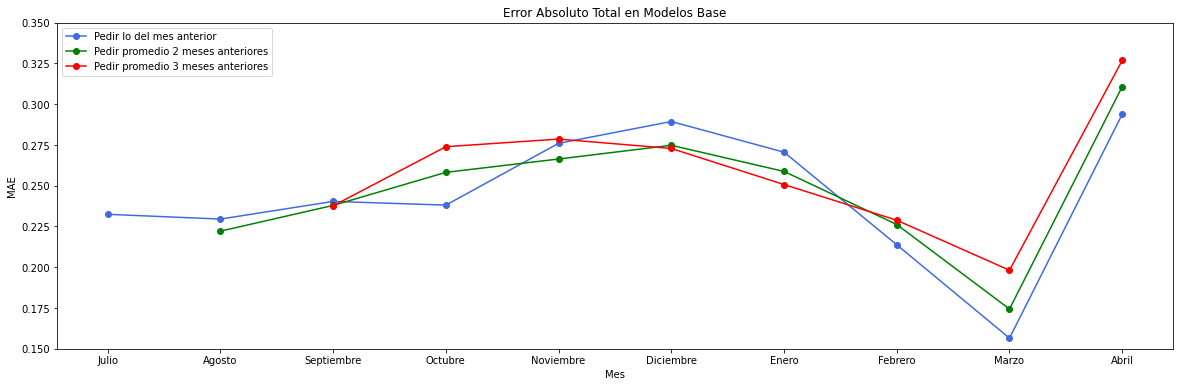

In [47]:
plt.figure(figsize=(20,6)) #impresión de la figura
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="green")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="red")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.15, 0.35)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')